In [1]:
import numpy as np
x_test = np.load('/home/jovyan/MQTTset/x_test.npy')
x_train = np.load('/home/jovyan/MQTTset/x_train.npy')
x_val = np.load('/home/jovyan/MQTTset/x_val.npy')
y_test = np.load('/home/jovyan/MQTTset/y_test.npy')
y_train = np.load('/home/jovyan/MQTTset/y_train.npy')
y_val = np.load('/home/jovyan/MQTTset/y_val.npy')

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
metrics = {
        "model" : '',
        "attack_model" : '',
        "epsilon" : '',
        "Accuracy": '',
        "Precision-micro": '',
        "Precision-macro": '',
        "Precision-weighted": '',
        "F1-micro": '',
        "F1-macro": '',
        "F1-weighted": '',
        "Recall_micro": '',
        "Recall_macro": '',
        "Recall_weighted": '',
        "FPR": '',
        "TPR": '',
        "FNR": '',
        "TNR": '',
        # "AUC": auc
    }
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/MQTTset/transfer_attack/attackmodel.csv", mode='a', index=False)

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/MQTTset/transfer_attack/attackmodel.csv", mode='a', index=False, header=False)

In [5]:
from joblib import dump, load
from sklearn.tree import DecisionTreeClassifier
import keras

best_dt = DecisionTreeClassifier(max_depth=6, min_samples_split=12)
best_dt.fit(x_train, y_train)

dump(best_dt, "/home/jovyan/MQTTset/pre_train/DT.joblib")

model = best_dt

2024-04-16 21:40:55.405882: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 21:40:55.409086: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 21:40:55.455181: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 21:40:56.256912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


epsilon = 0.01
FPR: [0.02665922 0.05336057 0.00012108 0.09212302 0.00104154 0.        ]
TPR: [0.9108251  0.88540574 0.48369565 0.94512379 0.18059793 0.97863093]
FNR: [0.0891749  0.11459426 0.51630435 0.05487621 0.81940207 0.02136907]
TNR: [0.97334078 0.94663943 0.99987892 0.90787698 0.99895846 1.        ]
Accuracy: 0.8949541746399436
Precision(micro,macro,weighted): 0.8949541746399436,0.8621879226810353,0.9000756809500253
F1(micro,macro,weighted: 0.8949541746399436,0.7451081132238372,0.888595105903067
Recall(micro,macro,weighted: 0.8949541746399436,0.7307131895700992,0.8949541746399436
FPR: 0.028884238481600228
tpr: 0.7307131895700992
fnr: 0.2692868104299008
tnr: 0.9711157615183997


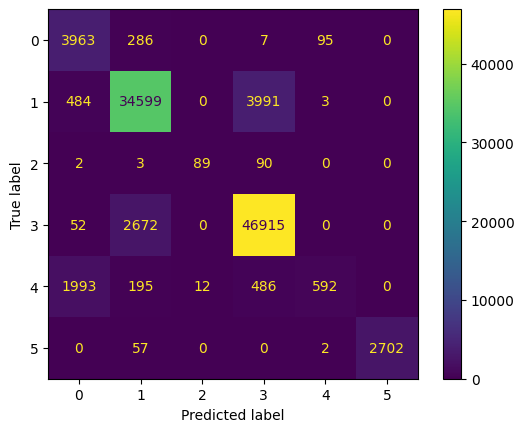

epsilon = 0.1
FPR: [0.02665922 0.05336057 0.00012108 0.09212302 0.00104154 0.        ]
TPR: [0.9108251  0.88540574 0.48369565 0.94512379 0.18059793 0.97863093]
FNR: [0.0891749  0.11459426 0.51630435 0.05487621 0.81940207 0.02136907]
TNR: [0.97334078 0.94663943 0.99987892 0.90787698 0.99895846 1.        ]
Accuracy: 0.8949541746399436
Precision(micro,macro,weighted): 0.8949541746399436,0.8621879226810353,0.9000756809500253
F1(micro,macro,weighted: 0.8949541746399436,0.7451081132238372,0.888595105903067
Recall(micro,macro,weighted: 0.8949541746399436,0.7307131895700992,0.8949541746399436
FPR: 0.028884238481600228
tpr: 0.7307131895700992
fnr: 0.2692868104299008
tnr: 0.9711157615183997


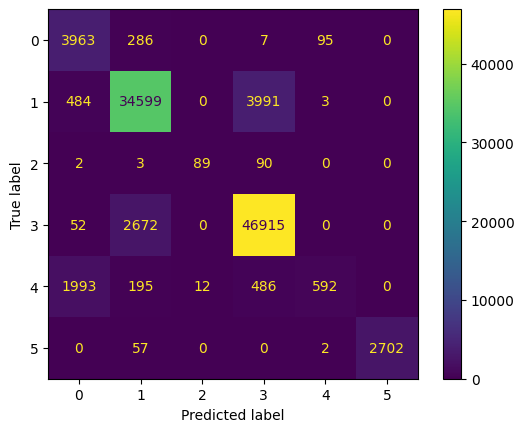

epsilon = 0.2
FPR: [0.02665922 0.05336057 0.00012108 0.09212302 0.00104154 0.        ]
TPR: [0.9108251  0.88540574 0.48369565 0.94512379 0.18059793 0.97863093]
FNR: [0.0891749  0.11459426 0.51630435 0.05487621 0.81940207 0.02136907]
TNR: [0.97334078 0.94663943 0.99987892 0.90787698 0.99895846 1.        ]
Accuracy: 0.8949541746399436
Precision(micro,macro,weighted): 0.8949541746399436,0.8621879226810353,0.9000756809500253
F1(micro,macro,weighted: 0.8949541746399436,0.7451081132238372,0.888595105903067
Recall(micro,macro,weighted: 0.8949541746399436,0.7307131895700992,0.8949541746399436
FPR: 0.028884238481600228
tpr: 0.7307131895700992
fnr: 0.2692868104299008
tnr: 0.9711157615183997


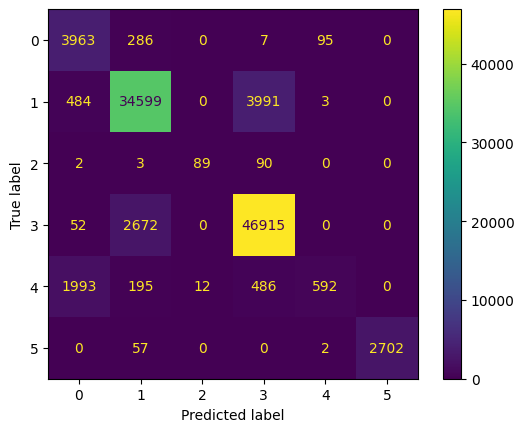

epsilon = 0.3
FPR: [0.02665922 0.05336057 0.00012108 0.09212302 0.00104154 0.        ]
TPR: [0.9108251  0.88540574 0.48369565 0.94512379 0.18059793 0.97863093]
FNR: [0.0891749  0.11459426 0.51630435 0.05487621 0.81940207 0.02136907]
TNR: [0.97334078 0.94663943 0.99987892 0.90787698 0.99895846 1.        ]
Accuracy: 0.8949541746399436
Precision(micro,macro,weighted): 0.8949541746399436,0.8621879226810353,0.9000756809500253
F1(micro,macro,weighted: 0.8949541746399436,0.7451081132238372,0.888595105903067
Recall(micro,macro,weighted: 0.8949541746399436,0.7307131895700992,0.8949541746399436
FPR: 0.028884238481600228
tpr: 0.7307131895700992
fnr: 0.2692868104299008
tnr: 0.9711157615183997


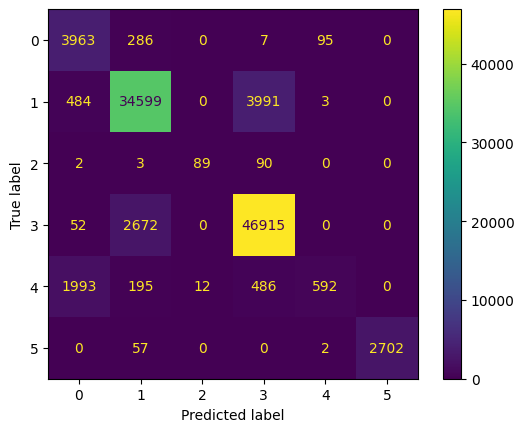

epsilon = 0.01
FPR: [0.02665922 0.05336057 0.00012108 0.09212302 0.00104154 0.        ]
TPR: [0.9108251  0.88540574 0.48369565 0.94512379 0.18059793 0.97863093]
FNR: [0.0891749  0.11459426 0.51630435 0.05487621 0.81940207 0.02136907]
TNR: [0.97334078 0.94663943 0.99987892 0.90787698 0.99895846 1.        ]
Accuracy: 0.8949541746399436
Precision(micro,macro,weighted): 0.8949541746399436,0.8621879226810353,0.9000756809500253
F1(micro,macro,weighted: 0.8949541746399436,0.7451081132238372,0.888595105903067
Recall(micro,macro,weighted: 0.8949541746399436,0.7307131895700992,0.8949541746399436
FPR: 0.028884238481600228
tpr: 0.7307131895700992
fnr: 0.2692868104299008
tnr: 0.9711157615183997


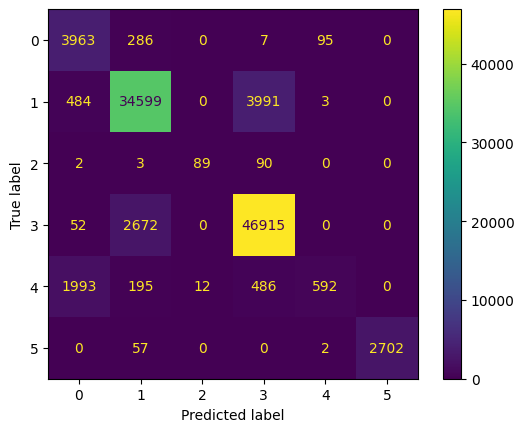

epsilon = 0.1
FPR: [0.02665922 0.05336057 0.00012108 0.09212302 0.00104154 0.        ]
TPR: [0.9108251  0.88540574 0.48369565 0.94512379 0.18059793 0.97863093]
FNR: [0.0891749  0.11459426 0.51630435 0.05487621 0.81940207 0.02136907]
TNR: [0.97334078 0.94663943 0.99987892 0.90787698 0.99895846 1.        ]
Accuracy: 0.8949541746399436
Precision(micro,macro,weighted): 0.8949541746399436,0.8621879226810353,0.9000756809500253
F1(micro,macro,weighted: 0.8949541746399436,0.7451081132238372,0.888595105903067
Recall(micro,macro,weighted: 0.8949541746399436,0.7307131895700992,0.8949541746399436
FPR: 0.028884238481600228
tpr: 0.7307131895700992
fnr: 0.2692868104299008
tnr: 0.9711157615183997


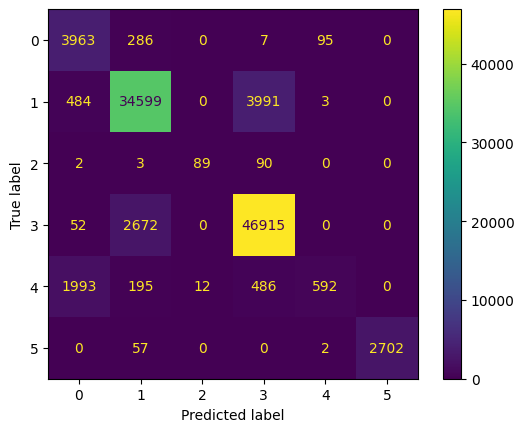

epsilon = 0.2
FPR: [0.02665922 0.05336057 0.00012108 0.09212302 0.00104154 0.        ]
TPR: [0.9108251  0.88540574 0.48369565 0.94512379 0.18059793 0.97863093]
FNR: [0.0891749  0.11459426 0.51630435 0.05487621 0.81940207 0.02136907]
TNR: [0.97334078 0.94663943 0.99987892 0.90787698 0.99895846 1.        ]
Accuracy: 0.8949541746399436
Precision(micro,macro,weighted): 0.8949541746399436,0.8621879226810353,0.9000756809500253
F1(micro,macro,weighted: 0.8949541746399436,0.7451081132238372,0.888595105903067
Recall(micro,macro,weighted: 0.8949541746399436,0.7307131895700992,0.8949541746399436
FPR: 0.028884238481600228
tpr: 0.7307131895700992
fnr: 0.2692868104299008
tnr: 0.9711157615183997


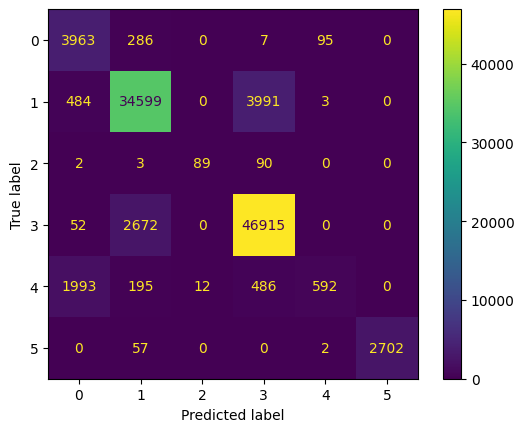

epsilon = 0.3
FPR: [0.02665922 0.05336057 0.00012108 0.09212302 0.00104154 0.        ]
TPR: [0.9108251  0.88540574 0.48369565 0.94512379 0.18059793 0.97863093]
FNR: [0.0891749  0.11459426 0.51630435 0.05487621 0.81940207 0.02136907]
TNR: [0.97334078 0.94663943 0.99987892 0.90787698 0.99895846 1.        ]
Accuracy: 0.8949541746399436
Precision(micro,macro,weighted): 0.8949541746399436,0.8621879226810353,0.9000756809500253
F1(micro,macro,weighted: 0.8949541746399436,0.7451081132238372,0.888595105903067
Recall(micro,macro,weighted: 0.8949541746399436,0.7307131895700992,0.8949541746399436
FPR: 0.028884238481600228
tpr: 0.7307131895700992
fnr: 0.2692868104299008
tnr: 0.9711157615183997


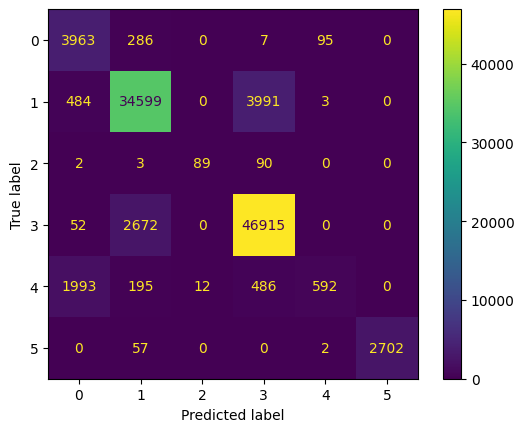

epsilon = 0.01
FPR: [0.02665922 0.05336057 0.00012108 0.09212302 0.00104154 0.        ]
TPR: [0.9108251  0.88540574 0.48369565 0.94512379 0.18059793 0.97863093]
FNR: [0.0891749  0.11459426 0.51630435 0.05487621 0.81940207 0.02136907]
TNR: [0.97334078 0.94663943 0.99987892 0.90787698 0.99895846 1.        ]
Accuracy: 0.8949541746399436
Precision(micro,macro,weighted): 0.8949541746399436,0.8621879226810353,0.9000756809500253
F1(micro,macro,weighted: 0.8949541746399436,0.7451081132238372,0.888595105903067
Recall(micro,macro,weighted: 0.8949541746399436,0.7307131895700992,0.8949541746399436
FPR: 0.028884238481600228
tpr: 0.7307131895700992
fnr: 0.2692868104299008
tnr: 0.9711157615183997


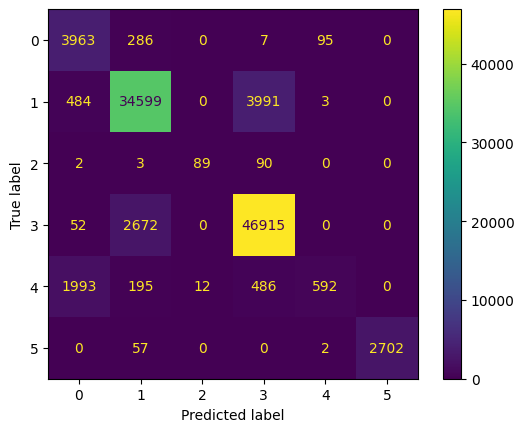

epsilon = 0.1
FPR: [0.02665922 0.05336057 0.00012108 0.09212302 0.00104154 0.        ]
TPR: [0.9108251  0.88540574 0.48369565 0.94512379 0.18059793 0.97863093]
FNR: [0.0891749  0.11459426 0.51630435 0.05487621 0.81940207 0.02136907]
TNR: [0.97334078 0.94663943 0.99987892 0.90787698 0.99895846 1.        ]
Accuracy: 0.8949541746399436
Precision(micro,macro,weighted): 0.8949541746399436,0.8621879226810353,0.9000756809500253
F1(micro,macro,weighted: 0.8949541746399436,0.7451081132238372,0.888595105903067
Recall(micro,macro,weighted: 0.8949541746399436,0.7307131895700992,0.8949541746399436
FPR: 0.028884238481600228
tpr: 0.7307131895700992
fnr: 0.2692868104299008
tnr: 0.9711157615183997


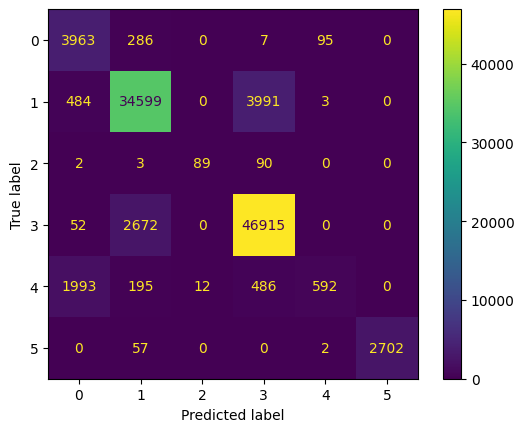

epsilon = 0.2
FPR: [0.02665922 0.05336057 0.00012108 0.09212302 0.00104154 0.        ]
TPR: [0.9108251  0.88540574 0.48369565 0.94512379 0.18059793 0.97863093]
FNR: [0.0891749  0.11459426 0.51630435 0.05487621 0.81940207 0.02136907]
TNR: [0.97334078 0.94663943 0.99987892 0.90787698 0.99895846 1.        ]
Accuracy: 0.8949541746399436
Precision(micro,macro,weighted): 0.8949541746399436,0.8621879226810353,0.9000756809500253
F1(micro,macro,weighted: 0.8949541746399436,0.7451081132238372,0.888595105903067
Recall(micro,macro,weighted: 0.8949541746399436,0.7307131895700992,0.8949541746399436
FPR: 0.028884238481600228
tpr: 0.7307131895700992
fnr: 0.2692868104299008
tnr: 0.9711157615183997


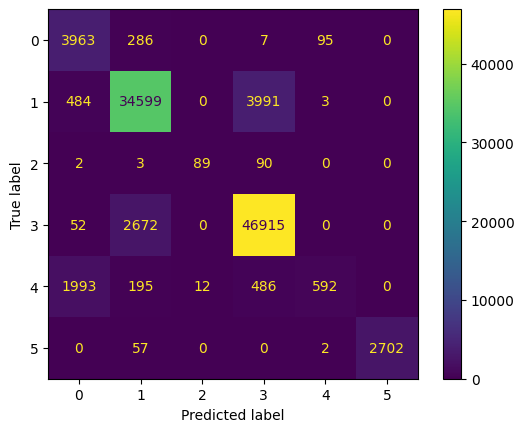

epsilon = 0.3
FPR: [0.02665922 0.05336057 0.00012108 0.09212302 0.00104154 0.        ]
TPR: [0.9108251  0.88540574 0.48369565 0.94512379 0.18059793 0.97863093]
FNR: [0.0891749  0.11459426 0.51630435 0.05487621 0.81940207 0.02136907]
TNR: [0.97334078 0.94663943 0.99987892 0.90787698 0.99895846 1.        ]
Accuracy: 0.8949541746399436
Precision(micro,macro,weighted): 0.8949541746399436,0.8621879226810353,0.9000756809500253
F1(micro,macro,weighted: 0.8949541746399436,0.7451081132238372,0.888595105903067
Recall(micro,macro,weighted: 0.8949541746399436,0.7307131895700992,0.8949541746399436
FPR: 0.028884238481600228
tpr: 0.7307131895700992
fnr: 0.2692868104299008
tnr: 0.9711157615183997


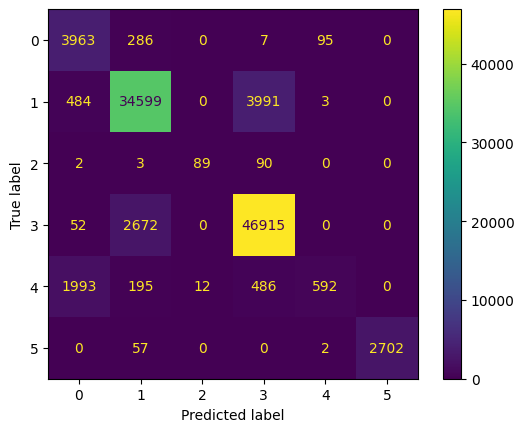

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-07
FPR: [0.01074374 0.48951223 0.         0.08857828 0.28888056 0.26677993]
TPR: [0.1783498  0.13465722 0.         0.07455831 0.05491153 0.35856574]
FNR: [0.8216502  0.86534278 1.         0.92544169 0.94508847 0.64143426]
TNR: [0.98925626 0.51048777 1.         0.91142172 0.71111944 0.73322007]
Accuracy: 0.10987007755060933
Precision(micro,macro,weighted): 0.10987007755060933,0.18066512131833,0.30825111774029645
F1(micro,macro,weighted: 0.10987007755060933,0.10031796057704977,0.13351563178095952
Recall(micro,macro,weighted: 0.10987007755060933,0.13350709989386067,0.10987007755060933
FPR: 0.19074912278022396
tpr: 0.13350709989386067
fnr: 0.8664929001061394
tnr: 0.8092508772197761


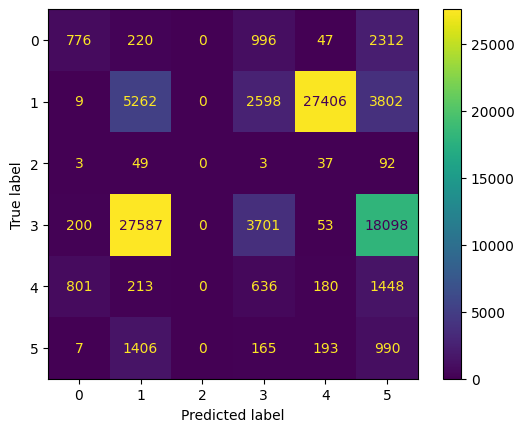

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-06
FPR: [0.01074374 0.48951223 0.         0.08857828 0.28888056 0.26677993]
TPR: [0.1783498  0.13465722 0.         0.07455831 0.05491153 0.35856574]
FNR: [0.8216502  0.86534278 1.         0.92544169 0.94508847 0.64143426]
TNR: [0.98925626 0.51048777 1.         0.91142172 0.71111944 0.73322007]
Accuracy: 0.10987007755060933
Precision(micro,macro,weighted): 0.10987007755060933,0.18066512131833,0.30825111774029645
F1(micro,macro,weighted: 0.10987007755060933,0.10031796057704977,0.13351563178095952
Recall(micro,macro,weighted: 0.10987007755060933,0.13350709989386067,0.10987007755060933
FPR: 0.19074912278022396
tpr: 0.13350709989386067
fnr: 0.8664929001061394
tnr: 0.8092508772197761


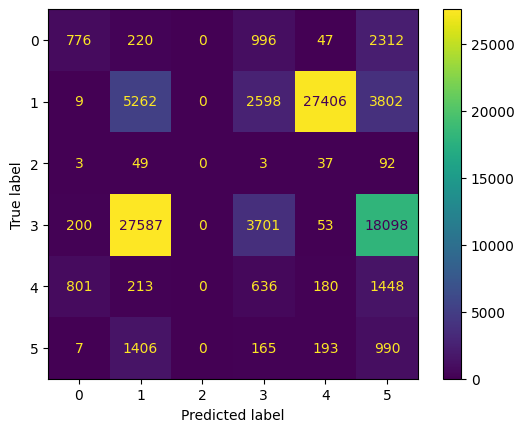

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-05
FPR: [0.01074374 0.48951223 0.         0.08857828 0.28888056 0.26677993]
TPR: [0.1783498  0.13465722 0.         0.07455831 0.05491153 0.35856574]
FNR: [0.8216502  0.86534278 1.         0.92544169 0.94508847 0.64143426]
TNR: [0.98925626 0.51048777 1.         0.91142172 0.71111944 0.73322007]
Accuracy: 0.10987007755060933
Precision(micro,macro,weighted): 0.10987007755060933,0.18066512131833,0.30825111774029645
F1(micro,macro,weighted: 0.10987007755060933,0.10031796057704977,0.13351563178095952
Recall(micro,macro,weighted: 0.10987007755060933,0.13350709989386067,0.10987007755060933
FPR: 0.19074912278022396
tpr: 0.13350709989386067
fnr: 0.8664929001061394
tnr: 0.8092508772197761


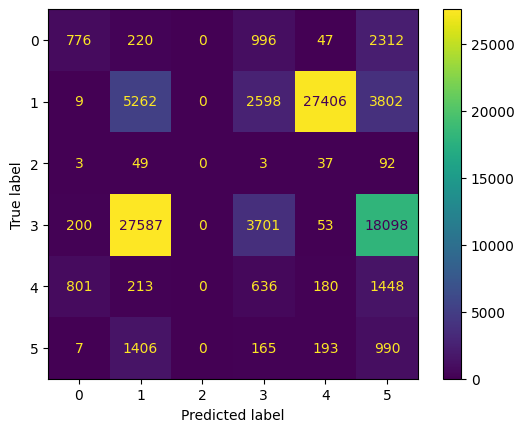

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.0001
FPR: [0.01074374 0.48951223 0.         0.08859842 0.28889097 0.26677993]
TPR: [0.1783498  0.13463162 0.         0.07453817 0.05491153 0.35856574]
FNR: [0.8216502  0.86536838 1.         0.92546183 0.94508847 0.64143426]
TNR: [0.98925626 0.51048777 1.         0.91140158 0.71110903 0.73322007]
Accuracy: 0.10984993453519992
Precision(micro,macro,weighted): 0.10984993453519992,0.18064043287641382,0.3081797677081931
F1(micro,macro,weighted: 0.10984993453519991,0.1003079317239226,0.13348839841818008
Recall(micro,macro,weighted: 0.10984993453519992,0.13349947723536795,0.10984993453519992
FPR: 0.1907542154378912
tpr: 0.13349947723536795
fnr: 0.866500522764632
tnr: 0.8092457845621088


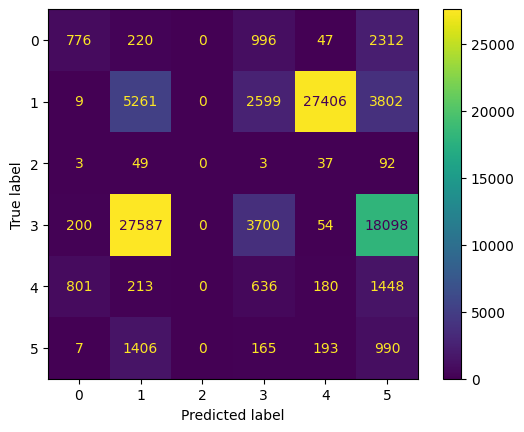

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/MQTTset/transfer_attack/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "DT", "FGSM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/MQTTset/transfer_attack/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "DT", "BIM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/MQTTset/transfer_attack/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "DT", "PGD", epsilon)

DF_eps = [1e-07, 1e-06, 1e-05, 1e-04]
for epsilon in DF_eps:
    filename = f'/home/jovyan/MQTTset/transfer_attack/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "DT", "DF", epsilon)